# Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


#Visualize the first 36 training images

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

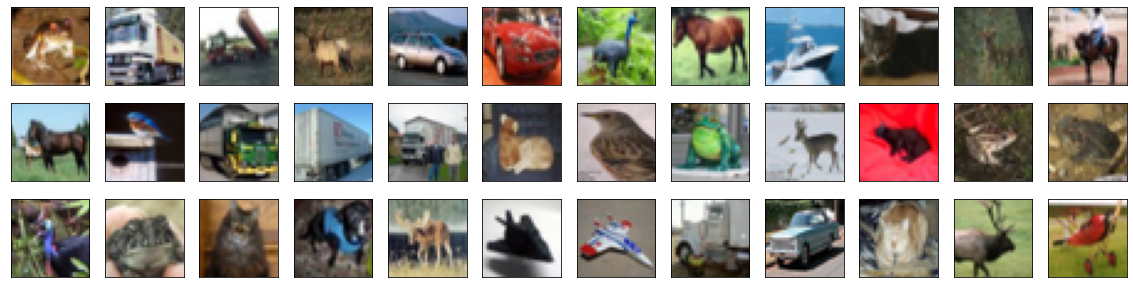

In [4]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

In [5]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#Break dataset into training, testing, and validation sets

In [6]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


# break training set into training and validation sets
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]

#print shape of trainig set
print("x_train shape:",x_train.shape)

#Print number of training, validation, and test images
print(x_train.shape[0],"train sample")
print(x_test.shape[0],"test samples")
print(x_valid.shape[0],"validation samples")

x_train shape: (45000, 32, 32, 3)
45000 train sample
10000 test samples
5000 validation samples


#Define model aechitecture

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding= "same",activation="relu",kernel_initializer="he_uniform",input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

#Compile the model

In [9]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

#Train the model 

In [10]:
from keras.callbacks import ModelCheckpoint

# train the model
ckpt = ModelCheckpoint(filepath = "model.weights.best.hdf5",verbose=1,save_best_only=True)


In [11]:
hist = model.fit(x_train,y_train,batch_size=32,epochs = 10,
                 validation_data=(x_valid,y_valid),callbacks=[ckpt],verbose=2,shuffle=True)

Epoch 1/10
1407/1407 - 58s - loss: 1.5554 - accuracy: 0.4719 - val_loss: 1.0737 - val_accuracy: 0.6226

Epoch 00001: val_loss improved from inf to 1.07371, saving model to model.weights.best.hdf5
Epoch 2/10
1407/1407 - 9s - loss: 0.9952 - accuracy: 0.6531 - val_loss: 0.8158 - val_accuracy: 0.7152

Epoch 00002: val_loss improved from 1.07371 to 0.81581, saving model to model.weights.best.hdf5
Epoch 3/10
1407/1407 - 9s - loss: 0.8379 - accuracy: 0.7122 - val_loss: 0.9787 - val_accuracy: 0.6766

Epoch 00003: val_loss did not improve from 0.81581
Epoch 4/10
1407/1407 - 9s - loss: 0.7382 - accuracy: 0.7473 - val_loss: 0.8373 - val_accuracy: 0.7202

Epoch 00004: val_loss did not improve from 0.81581
Epoch 5/10
1407/1407 - 10s - loss: 0.6841 - accuracy: 0.7658 - val_loss: 0.7476 - val_accuracy: 0.7500

Epoch 00005: val_loss improved from 0.81581 to 0.74765, saving model to model.weights.best.hdf5
Epoch 6/10
1407/1407 - 10s - loss: 0.6313 - accuracy: 0.7856 - val_loss: 0.6249 - val_accuracy: 0

#Load the model with the best validation accuracy 

In [19]:
model.load_weights('model.weights.best.hdf5')

#Visualize Some Predictions

In [20]:
y_hat = model.predict(x_test)

#define text labels (source:  https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

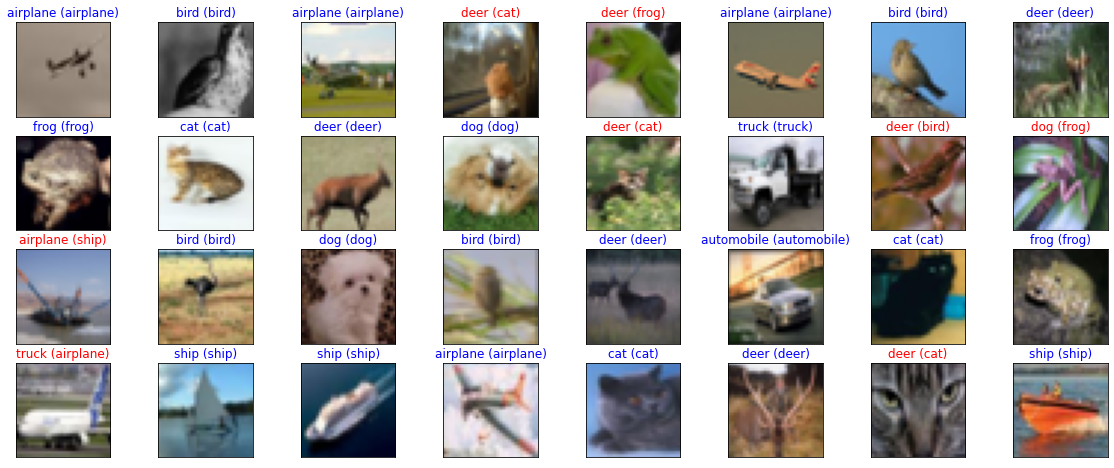

In [22]:
# plot random sample of test images, their predictedlabels, and ground truth

fig = plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(x_test.shape[0],size=32,replace=False)):
  ax = fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar10_labels[pred_idx],cifar10_labels[true_idx]),
               color=("blue" if pred_idx==true_idx else "red"))